In [121]:
import pandas as pd
import numpy as np 
from faker import Faker
from enum import Enum
from typing import List, Any, Tuple, Dict
import string
import uuid
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable, ALL, FRAME
from html import escape

In [6]:
person_entity = {
    "userId": str, 
    "username": str, 
    "password": str, 
    "email": str, 
    "name": str, 
    "surname": str, 
    "clinical_gender": ["M", "F"], 
    "current_location": [], 
    "age_range": ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"],
    "living_country": [], 
    "country_of_origin": []
    }

user_entity = {
    "current_working_status": ["Half-time-worker", "Full-time-worker", "Self-employee", "Unemployed"],
    "marital_status": ["Single", "Married"], 
    "life_style": ["Sedentary", "Lightly active", "Moderately active", "Very active"], 
    "weight": [],
    "ethnicity": ["White", "Black", "Latino", "Asian"], 
    "height": []
}

cultural_factors = {
    "vegan_observant": [True, False],
    "vegetarian_observant": [True, False], 
    "halal_observant": [True, False], 
    "kosher_observant": [True, False],
    "religion_observant": [True, False], 
    "drink_limitation": [True, False], 
    "pescatarian_observant": [True, False],
    "religion": [],
    "food_limitation": []
}

sustainability = {
    "environmental_harm": [],
    "eco_score": [],
    "co2_food_print": [],
    "recyclable_packaging": []
}

actions = {
    "action_type": [],
    "location": [], 
    "action_date": []
}

preferences = {
    "breakfast_time": [],
    "lunch_time": [],
    "dinner_time": []
}

health_conditions = {
    "food_allergies": []
}

user_goals = {
    "user_goals": ["loss_weight", "fit", "food_restrictions"]
}

cultural_factors = {
    "cultural_factors": []
}

diet = {
    "diet_daily_calories": [],
    "calorie_deficit": []
}

    

In [7]:
df_personal_data = pd.DataFrame(data=[], columns = list(person_entity.keys()))

In [8]:
# set seed for random generator 
np.random.seed(0)

In [9]:
df_personal_data["clinical_gender"] = np.random.choice(np.array(person_entity.get("clinical_gender")), 
                                                       size=500, 
                                                       replace=True, 
                                                       p=[0.5, 0.5])

In [10]:
fake = Faker()

In [11]:
class Gender(str, Enum):
    male = "M"
    female = "F"

In [12]:
def create_name_surname(gender: str) -> str:
    if gender == Gender.male:
        names = fake.name_male()
    else:
        names = fake.name_female()
    return names.split(" ")

In [13]:
def generate_country(samples) -> List:
    return list(map(lambda x: fake.country(), range(samples)))

In [14]:
def generate_email_from_name(name: str, surname: str, domain: str="fake.com"):
    return f"{name.lower()}.{surname.lower()}@{domain.lower()}"

In [15]:
def password_generation(length): 
    chars = string.ascii_letters + string.digits
    list_chars = list(chars)
    password = np.random.choice(list_chars, length)
    return ''.join(password)

In [16]:
def generate_age_range(probabilities = None, list_age_range:List = person_entity.get("age_range")):
    return np.random.choice(list_age_range, size=1, replace=True, p=probabilities)[0]

In [17]:
def generate_localization(samples): 
    return list(map(lambda x: fake.locale(), range(samples)))

In [18]:
names = df_personal_data["clinical_gender"].apply(create_name_surname)

In [19]:
names_list = list(zip(*names))

In [20]:
df_personal_data["name"] = names_list[0]
df_personal_data["surname"] = names_list[1]

In [21]:
df_personal_data["country_of_origin"] = generate_country(500)
df_personal_data["living_country"] = generate_country(500)
df_personal_data["current_location"] = generate_country(500)
df_personal_data["current_location"] = generate_localization(500)

In [22]:
list_names = list(zip(*df_personal_data[["name", "surname"]].values.tolist()))

In [23]:
df_personal_data["email"] =list(map(lambda x, y: generate_email_from_name(x, y), list_names[0], list_names[1]))

In [24]:
df_personal_data["password"] = list(map(lambda x: password_generation(8), range(500)))

In [25]:
df_personal_data["username"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])
df_personal_data["userId"] = df_personal_data["name"].apply(lambda x: x.lower()+str(uuid.uuid4()).split("-")[-2])

In [26]:
df_personal_data["age_range"] = list(map(lambda x: generate_age_range(), range(500)))

In [27]:
df_personal_data.head(7)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,amber8c29,amberad8b,NQ7CysdS,amber.parsons@fake.com,Amber,Parsons,F,ja_JP,70-79,Guinea-Bissau,Kazakhstan
1,kendraae9f,kendraa5de,tT2akdgB,kendra.li@fake.com,Kendra,Li,F,fil_PH,80-89,Norfolk Island,Chile
2,carola34f,carola478,J5gtIYYM,carol.shaffer@fake.com,Carol,Shaffer,F,af_ZA,70-79,Kenya,Gabon
3,dr.929c,dr.beb7,uR2aKTPc,dr..ann@fake.com,Dr.,Ann,F,mr_IN,30-39,Jordan,Moldova
4,james9be2,jamesa60b,Hmp2Hxmf,james.mckinney@fake.com,James,Mckinney,M,ko_KR,80-89,New Zealand,Haiti
5,dana9ef4,danaba0e,Mbkg9gMM,dana.martin@fake.com,Dana,Martin,F,nds_DE,20-29,Burundi,Guam
6,alecac99,alecb7b0,lYvYYZcm,alec.reeves@fake.com,Alec,Reeves,M,my_MM,90-100,Seychelles,Isle of Man


In [28]:
# save data 
df_personal_data.to_csv("personal_profiles.csv", index=False)

# 2. Generate User data 

In [29]:
user_columns = ["userId", "current_working_status", "marital_status", "life_style", "weight", "ethnicity", "height"]
df_user_entity = pd.DataFrame(data=[], columns=user_columns)

In [30]:
df_user_entity["userId"] = df_personal_data["userId"]

In [31]:
def choose_one_from_list(list_values: List, 
                         samples : int,  
                         probabilities: List = None, 
                         size: int =1,
                         replace: bool = True):
    return list(map(lambda x: np.random.choice(list_values, size=size, replace=replace, p=probabilities), range(samples)))

In [32]:
df_user_entity["current_working_status"] = choose_one_from_list(user_entity.get("current_working_status"), samples=500)
df_user_entity["marital_status"] = choose_one_from_list(user_entity.get("marital_status"), samples=500)
df_user_entity["life_style"] = choose_one_from_list(user_entity.get("life_style"), samples=500)
df_user_entity["ethnicity"] = choose_one_from_list(user_entity.get("ethnicity"), samples=500)

In [33]:
# generate BMI cases 
BMI_values = ["underweight", "healthy", "overweight", "obesity"]
BMI_prob = [0.1, 0.3, 0.3, 0.3]
bmis = np.random.choice(BMI_values, size=500, replace=True, p=BMI_prob)

In [34]:
male_height = np.random.normal(170, 10, 500)
female_height = np.random.normal(160, 10, 500)

In [35]:
# set height 
df_user_entity["BMI"] = bmis

In [36]:
df_user_entity.loc[df_personal_data["clinical_gender"] == 'F',"height"] = np.random.choice(female_height, size=246)
df_user_entity.loc[df_personal_data["clinical_gender"] == 'M',"height"] = np.random.choice(male_height, size=254)

In [37]:
df_user_entity["height"] = df_user_entity["height"].astype(int)

In [38]:
class BMI_constants(str, Enum):
    underweight = "underweight"
    healthy = "healthy"
    overweight = "overweight"
    obesity = "obesity"

In [39]:
# set the weight 
def calculate_weight_from_height(height: float, bmi: string):
    bmi_numeric = 0.0
    if bmi == BMI_constants.underweight:
        bmi_numeric = 18.0
    elif bmi == BMI_constants.healthy:
        bmi_numeric = 21.0
    elif bmi == BMI_constants.overweight:
        bmi_numeric = 28.0
    else:
        bmi_numeric = 32.0
    return (height**2)*bmi_numeric

In [40]:
df_user_entity["weight"] = np.round(df_user_entity.apply(lambda row: calculate_weight_from_height(row["height"]/100.0, row["BMI"]), axis=1), 2)

In [41]:
df_user_entity["current_working_status"] = df_user_entity["current_working_status"].apply(lambda x: x[0])
df_user_entity["marital_status"] = df_user_entity["marital_status"].apply(lambda x: x[0])
df_user_entity["life_style"] = df_user_entity["life_style"].apply(lambda x: x[0])
df_user_entity["ethnicity"] = df_user_entity["ethnicity"].apply(lambda x: x[0])

In [42]:
df_user_entity.head(6)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,amber8c29,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,kendraae9f,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,carola34f,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,dr.929c,Unemployed,Married,Lightly active,47.25,Latino,150,healthy
4,james9be2,Full-time-worker,Single,Moderately active,91.73,Asian,181,overweight
5,dana9ef4,Full-time-worker,Single,Lightly active,39.43,Latino,148,underweight


In [43]:
df_user_entity.to_csv("user_entity.csv", index=False)

# 3. Generate health conditions 

In [44]:
df_health_conditions = pd.DataFrame(data=[], columns=["userId", "allergy"])

In [45]:
df_health_conditions["userId"] = df_user_entity["userId"]

In [46]:
# allergy array 
allergies = ["cow's milk", "eggs", "peanut", "soy", "fish", "tree nuts", "shellfish", "wheat", "None"]
allergies_prob = [0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.4]

In [47]:
user_allergies = np.random.choice(allergies, size=500, replace=True, p = allergies_prob)

In [48]:
df_health_conditions["allergy"] = user_allergies

In [49]:
df_health_conditions.head(6)

,userId,allergy
0,amber8c29,cow's milk
1,kendraae9f,eggs
2,carola34f,None
3,dr.929c,soy
4,james9be2,eggs
5,dana9ef4,eggs


In [50]:
df_health_conditions.to_csv("health_conditions.csv", index=False)

# 4. Generate user goals

In [51]:
# define user goals 
# define loose weight 
df_user_goals = pd.DataFrame(columns=["userId", "nutrition_goal"], data=[])

In [52]:
df_user_goals["userId"] = df_user_entity["userId"]

In [53]:
class NutritionGoals(str, Enum):
    lose_weight = "lose_weight"
    maintain_fit = "maintain_fit"
    gain_weight = "gain_weight"

In [54]:
def define_user_goal_according_BMI(bmi: str):
    if bmi == BMI_constants.underweight:
        # goal gain muscle 
        return f"{NutritionGoals.gain_weight}"
    elif bmi == BMI_constants.healthy:
        # Maintain fit and increase activity if required 
        return f"{NutritionGoals.maintain_fit}"
    else:
        # nutritional goal loss weight 
        return f"{NutritionGoals.lose_weight}"

In [55]:
df_user_goals["nutrition_goal"]=df_user_entity["BMI"].apply(lambda x: define_user_goal_according_BMI(x))

In [56]:
df_user_goals.head(6)

,userId,nutrition_goal
0,amber8c29,lose_weight
1,kendraae9f,lose_weight
2,carola34f,lose_weight
3,dr.929c,maintain_fit
4,james9be2,lose_weight
5,dana9ef4,gain_weight


# 4. Generate cultural factors 

In [57]:
df_cultural_factors = pd.DataFrame(data=[], columns=["userId", "cultural_factor"])

In [58]:
df_cultural_factors["userId"] = df_personal_data["userId"]

In [59]:
food_restrictions = ["vegan_observant", "vegetarian_observant", "halal_observant", "kosher_observant", "None"]
food_restriction_probs = [0.2, 0.3, 0.05, 0.05, 0.4]

In [60]:
food_restrictions_user = np.random.choice(food_restrictions, size=500, replace=True, p=food_restriction_probs)

In [61]:
df_cultural_factors["cultural_factor"] = food_restrictions_user

In [62]:
df_cultural_factors.head(6)

,userId,cultural_factor
0,amber8c29,vegetarian_observant
1,kendraae9f,kosher_observant
2,carola34f,vegetarian_observant
3,dr.929c,vegan_observant
4,james9be2,vegan_observant
5,dana9ef4,vegetarian_observant


In [63]:
df_cultural_factors.to_csv("cultural_factors.csv", index=False)

# 5. Generate preferences

In [64]:
df_preferences = pd.DataFrame(data=[], columns=["userId", "breakfast_time", "lunch_time", "dinner_time"])

In [65]:
df_preferences["userId"] = df_personal_data["userId"]

In [66]:
breakfast_time = np.random.normal(7, 1, size=500)
lunch_time = np.random.normal(13, 1, size=500)
dinner_time = np.random.normal(20, 1, size=500)

In [67]:
df_preferences["breakfast_time"] = np.round(breakfast_time, 2)
df_preferences["lunch_time"] = np.round(lunch_time, 2)
df_preferences["dinner_time"] = np.round(dinner_time, 2)

In [68]:
df_preferences.head(6)

,userId,breakfast_time,lunch_time,dinner_time
0,amber8c29,7.38,11.53,19.98
1,kendraae9f,7.69,13.00,20.49
2,carola34f,6.94,12.64,20.73
3,dr.929c,7.72,13.43,19.75
4,james9be2,8.67,10.78,20.36
5,dana9ef4,7.51,14.31,21.27


In [69]:
df_preferences.to_csv("preferences.csv", index=False)

# 6. Generate Therapy (Diet)

Based on Harris-Benedict equations:
* For men: 
  $BMR = 13.397W + 4.799H - 5.677A + 88.362$
* For women: 
  $BMR = 9.247W + 3.098H - 4.330A + 447.593$

In [70]:
def calculate_basal_metabolic_rate(weight: float, height: float, age: int, clinical_gender: str):
    BMR = 0
    if Gender.male == clinical_gender:
        BMR = 88.362 + (13.397 * weight) + (4.799 * height) - (5.677 * age)
    else:
        BMR = 447.593 + (9.247 * weight) + (3.098 * height) - (4.330 * age)
    return BMR

In [71]:
class ActivityLevel(str, Enum): 
    sedentary = "Sedentary"
    light_active = "Lightly active"
    moderate_active = "Moderately active"
    very_active = "Very active"

In [72]:
def calculate_daily_calorie_needs(BMR: float, activity_level: str):
    calories_daily = 0
    if activity_level == ActivityLevel.sedentary:
        calories_daily = 1.2 * BMR
    elif activity_level == ActivityLevel.light_active:
        calories_daily = 1.375 * BMR
    elif activity_level == ActivityLevel.moderate_active:
        calories_daily = 1.725 * BMR
    else:
        calories_daily = 1.9 * BMR
    return calories_daily

In [73]:
def define_daily_calorie_needs(nutrition_goal: str, daily_calorie_need: float):
    projected_calories_need = 0 
    if nutrition_goal == NutritionGoals.gain_weight:
        projected_calories_need = daily_calorie_need + 500
    elif nutrition_goal == NutritionGoals.maintain_fit:
        projected_calories_need = daily_calorie_need
    else:
        projected_calories_need = daily_calorie_need - 500
    return projected_calories_need

In [74]:
def generate_diet_plan(weight: float, 
                       height: float, 
                       age_range: str, 
                       clinical_gender: str, 
                       activity_level: str, 
                       nutrition_goal: str): 
    # transform age 
    age_list = age_range.split("-")
    age = np.ceil((int(age_list[-1]) - int(age_list[0]))/2 + int(age_list[0]))
    bmr = calculate_basal_metabolic_rate(weight, height, age, clinical_gender)
    calorie_needs = calculate_daily_calorie_needs(bmr, activity_level)
    projected_calorie_needs = define_daily_calorie_needs(nutrition_goal, calorie_needs)
    return projected_calorie_needs
    

In [124]:
# generate treatment for the users 
df_treatment = pd.DataFrame(data=[], columns=["userId", "projected_daily_calories"])
df_treatment["userId"] = df_personal_data["userId"]


In [125]:
# prepare data
df_user_data = df_user_goals.merge(df_personal_data[["userId", "clinical_gender", "age_range"]],
                                  on="userId")


In [126]:
df_user_data = df_user_data.merge(df_user_entity[["userId","life_style", "weight", "height"]], 
                                  on="userId")

In [127]:
df_treatment["projected_daily_calories"] = np.ceil(df_user_data.apply(lambda row: generate_diet_plan(weight=row["weight"], 
                                                  height=row["height"], 
                                                  age_range=row["age_range"],
                                                  clinical_gender=row["clinical_gender"],
                                                  activity_level=row["life_style"],
                                                  nutrition_goal=row["nutrition_goal"]
                                                  ), axis=1))

In [128]:
df_treatment.head(4)

,userId,projected_daily_calories
0,amber8c29,920.0
1,kendraae9f,1192.0
2,carola34f,2022.0
3,dr.929c,1647.0


In [129]:
df_treatment.to_csv("projected_calories.csv", index=False)

In [130]:
df_treatment["projected_daily_calories"].min(axis=0)

779.0

In [131]:
df_cultural_factors

,userId,cultural_factor
0,amber8c29,vegetarian_observant
1,kendraae9f,kosher_observant
2,carola34f,vegetarian_observant
3,dr.929c,vegan_observant
4,james9be2,vegan_observant
...,...,...
495,jacob9cd0,None
496,brian93ef,None
497,todd9438,None
498,stevenbcf8,vegetarian_observant


# 7. Data Analysis

In [132]:
df_personal_data.head(3)

,userId,username,password,email,name,surname,clinical_gender,current_location,age_range,living_country,country_of_origin
0,amber8c29,amberad8b,NQ7CysdS,amber.parsons@fake.com,Amber,Parsons,F,ja_JP,70-79,Guinea-Bissau,Kazakhstan
1,kendraae9f,kendraa5de,tT2akdgB,kendra.li@fake.com,Kendra,Li,F,fil_PH,80-89,Norfolk Island,Chile
2,carola34f,carola478,J5gtIYYM,carol.shaffer@fake.com,Carol,Shaffer,F,af_ZA,70-79,Kenya,Gabon


In [133]:
df_user_entity.head(4)

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,amber8c29,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,kendraae9f,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,carola34f,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,dr.929c,Unemployed,Married,Lightly active,47.25,Latino,150,healthy


In [85]:
df_health_conditions.head(3)

,userId,allergy
0,amber8c29,cow's milk
1,kendraae9f,eggs
2,carola34f,None


In [86]:
users = df_user_entity[df_user_entity["BMI"] == "underweight"]["userId"]

In [87]:
list(users.values)

['dana9ef4',
 'sandra8cb1',
 'desireea6ef',
 'mrs.8731',
 'manuel8f32',
 'dr.823c',
 'carlae54',
 'rickbbbc',
 'williebce3',
 'joshua9c4e',
 'andrewb284',
 'ashley8dad',
 'christopher852d',
 'amyb3fe',
 'adamaee8',
 'ann8f10',
 'adam9c42',
 'alexisb13f',
 'joshuab9c8',
 'robinbfd8',
 'mr.bc5b',
 'kim8e50',
 'robert8ea3',
 'michaelaa7d',
 'lori9a57',
 'dr.a190',
 'dawn97c3',
 'beth8de4',
 'vincent89d1',
 'kimberlyab3c',
 'bridgetb044',
 'kaitlyn8516',
 'anna8d1b',
 'corey8aa2',
 'susanbc93',
 'kevin9018',
 'aaron9c11',
 'joanb6c7',
 'jessicaa14f',
 'jeromeb53d']

In [88]:
vals = df_health_conditions["allergy"].value_counts()

In [89]:
list(zip(list(vals.index), list(vals.values)))

[('None', 199),
 ('peanut', 47),
 ('wheat', 39),
 ('eggs', 38),
 ("cow's milk", 36),
 ('fish', 36),
 ('shellfish', 36),
 ('soy', 35),
 ('tree nuts', 34)]

In [90]:
vals.index

Index(['None', 'peanut', 'wheat', 'eggs', 'cow's milk', 'fish', 'shellfish',
       'soy', 'tree nuts'],
      dtype='object', name='allergy')

In [91]:
vals.values

array([199,  47,  39,  38,  36,  36,  36,  35,  34])

In [92]:
weight_condition = df_user_entity["BMI"].value_counts()

In [93]:
weight_condition.sum()

500

In [94]:
a = "{0}: {1}"

In [95]:
a.format("a", "b")

'a: b'

In [96]:
def format_dict_text(tuple_values: Tuple):
    text_template = "{0}: {1}"
    return text_template.format(tuple_values[0], tuple_values[1])

In [97]:
def format_multiline(list_to_format: List[Any]): 
    format_string = " \t ".join(list_to_format)
    return format_string

In [98]:
def draw_summary_row(row_text, character = "-", up_multiplicity=0, down_multiplicity=0): 
    print(f"{character*up_multiplicity}")
    print(f"| {row_text} |")
    if down_multiplicity > 0:
        print(f"{character*down_multiplicity}")

In [99]:
weight_condition = df_user_entity["BMI"].value_counts()
for condition in weight_condition.index:
    print(condition)

healthy
overweight
obesity
underweight


# 8 Simulation 

In [100]:
from scipy.stats import bernoulli

In [101]:
p = np.array([[0.65, 0.35, 0.0, 0.0], 
              [0.05, 0.80, 0.15, 0.0],
              [0.0, 0.28, 0.67, 0.05],
              [0.0, 0.0, 0.35, 0.65]
              ])

In [135]:
def simulate_final_result(probability_matrix: np.array, samples_size_list: Dict[str, int], state_list: List[str]):
    # generate transitions 
    transitions =  {}
    states = ['underweight', 'healthy', 'overweight', 'obesity']
    for i, state in enumerate(states):
        initial_state = state
        sample_size = samples_size_list[state]
        transitions[initial_state] = {}
        for j in range(probability_matrix.shape[1]):
            if sample_size > 0 and probability_matrix[i][j] > 0.0:
                next_state = state_list[j]
                transition_sample = bernoulli.rvs(probability_matrix[i][j], size=sample_size)
                transitions[initial_state][next_state] = transition_sample.tolist()
                sample_size -= sum(transition_sample)
    return transitions

In [136]:
counts = df_user_entity.groupby(by="BMI").count()["userId"]

In [139]:
transition_matrix = simulate_final_result(p, dict(counts.items()), counts.index)

In [140]:
transition_matrix

{'underweight': {'healthy': [0,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0],
  'obesity': [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]},
 'healthy': {'healthy': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
  

In [141]:
df_user_entity

,userId,current_working_status,marital_status,life_style,weight,ethnicity,height,BMI
0,amber8c29,Unemployed,Married,Sedentary,66.36,Black,144,obesity
1,kendraae9f,Unemployed,Single,Sedentary,88.18,Latino,166,obesity
2,carola34f,Half-time-worker,Single,Very active,75.31,Black,164,overweight
3,dr.929c,Unemployed,Married,Lightly active,47.25,Latino,150,healthy
4,james9be2,Full-time-worker,Single,Moderately active,91.73,Asian,181,overweight
...,...,...,...,...,...,...,...,...
495,jacob9cd0,Self-employee,Single,Lightly active,69.02,Asian,157,overweight
496,brian93ef,Half-time-worker,Single,Lightly active,93.57,Asian,171,obesity
497,todd9438,Full-time-worker,Single,Moderately active,72.96,Latino,151,obesity
498,stevenbcf8,Full-time-worker,Married,Lightly active,61.41,Black,171,healthy


In [142]:
df_user_data.head(3)

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height
0,amber8c29,lose_weight,F,70-79,Sedentary,66.36,144
1,kendraae9f,lose_weight,F,80-89,Sedentary,88.18,166
2,carola34f,lose_weight,F,70-79,Very active,75.31,164


In [143]:
df_user_join = df_user_data.merge(df_treatment, on="userId")
df_user_join = df_user_join.merge(df_cultural_factors,  on="userId")
df_user_join = df_user_join.merge(df_health_conditions,  on="userId")
df_user_join = df_user_join.merge(df_user_entity[["userId", "BMI"]],  on="userId")

In [144]:
df_user_join.to_csv("simulation_ready_user_data.csv", index=False, sep="|")

In [145]:
# load recipes data 
df_recipes = pd.read_csv("processed_recipes_dataset.csv", sep="|")

In [146]:
df_recipes_filter = df_recipes[df_recipes["calories"]>=0.0]

In [147]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,amber8c29,lose_weight,F,70-79,Sedentary,66.36,144,920.0,vegetarian_observant,cow's milk,obesity
1,kendraae9f,lose_weight,F,80-89,Sedentary,88.18,166,1192.0,kosher_observant,eggs,obesity
2,carola34f,lose_weight,F,70-79,Very active,75.31,164,2022.0,vegetarian_observant,None,overweight
3,dr.929c,maintain_fit,F,30-39,Lightly active,47.25,150,1647.0,vegan_observant,soy,healthy
4,james9be2,lose_weight,M,80-89,Moderately active,91.73,181,2439.0,vegan_observant,eggs,overweight
...,...,...,...,...,...,...,...,...,...,...,...
495,jacob9cd0,lose_weight,M,40-49,Lightly active,69.02,157,1578.0,None,None,overweight
496,brian93ef,lose_weight,M,60-69,Lightly active,93.57,171,1967.0,None,None,obesity
497,todd9438,lose_weight,M,80-89,Moderately active,72.96,151,1757.0,None,eggs,obesity
498,stevenbcf8,maintain_fit,M,50-59,Lightly active,61.41,171,1952.0,vegetarian_observant,cow's milk,healthy


In [148]:
df_recipes_filter

,title,raw_text,meal_type,cultural_restriction,calories,allergies
0,Fruit Salad,"1. Fruit Salad: 70 calories per portion, 4 por...",breakfast,vegan,70.0,contains fruits only
1,Vegan Pancakes,"2. Vegan Pancakes: 150 calories per portion, 4...",breakfast,vegan,150.0,NaN
2,Overnight Chia Pudding,3. Overnight Chia Pudding: 200 calories per po...,breakfast,vegan,200.0,contains nuts (almonds)
3,Avocado Toast,"4. Avocado Toast: 250 calories per portion, 2 ...",breakfast,vegan,250.0,NaN
4,Vegan Omelette,"5. Vegan Omelette: 300 calories per portion, 1...",breakfast,vegan,300.0,contains chickpea flour
...,...,...,...,...,...,...
10195,Mexican stuffed bell peppers with ground beef...,96. Mexican stuffed bell peppers with ground b...,dinner,NaN,450.0,contains lactose
10196,Caprese quinoa salad with grilled chicken - 3...,97. Caprese quinoa salad with grilled chicken ...,dinner,NaN,350.0,contains lactose
10197,Baked coconut shrimp with mango salsa and jas...,98. Baked coconut shrimp with mango salsa and ...,dinner,NaN,420.0,contains shellfish
10198,One-pot creamy chicken and mushroom pasta - 4...,99. One-pot creamy chicken and mushroom pasta ...,dinner,NaN,480.0,contains gluten


In [821]:
df_recipes_filter.sample(10)

,title,raw_text,meal_type,cultural_restriction,calories,allergies
7506,Quinoa breakfast bowl with fruits and seeds (...,7. Quinoa breakfast bowl with fruits and seeds...,breakfast,kosher,350.0,NaN
14,Vegan Sausage and Biscuits,15. Vegan Sausage and Biscuits: 800 calories p...,breakfast,vegan,800.0,NaN
5027,Indian-Style Spinach and Chickpeas,28. Indian-Style Spinach and Chickpeas: 300kca...,dinner,vegetarian,300.0,NaN
2741,Greek Yogurt with Honey and Pistachios,42. Greek Yogurt with Honey and Pistachios: 30...,breakfast,vegetarian,300.0,contains dairy and nuts
6661,Moroccan Lamb Tagine,62. Moroccan Lamb Tagine: Total calories per p...,lunch,halal,500.0,NaN
3419,Mini Vegetable Frittatas,20. Mini Vegetable Frittatas: (150 kcals per p...,morning snacks,vegetarian,150.0,NaN
6760,Baked Chicken Parmesan,61. Baked Chicken Parmesan: 500kcals per porti...,lunch,halal,500.0,contains gluten
3001,Greek Yogurt Parfait,2. Greek Yogurt Parfait: 150 calories per port...,morning snacks,vegetarian,150.0,NaN
4329,"Veggie Tacos - 350kcals per portion, 2 portio...","30. Veggie Tacos - 350kcals per portion, 2 por...",lunch,vegetarian,350.0,contains gluten
7194,Moroccan Chickpea Tagine,95. Moroccan Chickpea Tagine: 350 calories per...,dinner,halal,350.0,contains legumes


In [154]:
df_recipes_filter["allergies"].fillna("")

0           contains fruits only
1                               
2        contains nuts (almonds)
3                               
4        contains chickpea flour
                  ...           
10195           contains lactose
10196           contains lactose
10197         contains shellfish
10198            contains gluten
10199           contains lactose
Name: allergies, Length: 6300, dtype: object

In [149]:
df_user_join["allergy"].value_counts()

allergy
None          199
peanut         47
wheat          39
eggs           38
cow's milk     36
fish           36
shellfish      36
soy            35
tree nuts      34
Name: count, dtype: int64

In [150]:
def allergy_searcher(recipes_db_allergy_col, allergy:str):
    res = []
    allergy_low = allergy.lower()
    for item in recipes_db_allergy_col.items():
        text = str(item[1]).lower()
        if allergy_low in text:
            print(text)
            print(allergy_low)
            res.append(False)
        else:
            res.append(True)
    return res

In [151]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,amber8c29,lose_weight,F,70-79,Sedentary,66.36,144,920.0,vegetarian_observant,cow's milk,obesity
1,kendraae9f,lose_weight,F,80-89,Sedentary,88.18,166,1192.0,kosher_observant,eggs,obesity
2,carola34f,lose_weight,F,70-79,Very active,75.31,164,2022.0,vegetarian_observant,None,overweight
3,dr.929c,maintain_fit,F,30-39,Lightly active,47.25,150,1647.0,vegan_observant,soy,healthy
4,james9be2,lose_weight,M,80-89,Moderately active,91.73,181,2439.0,vegan_observant,eggs,overweight
...,...,...,...,...,...,...,...,...,...,...,...
495,jacob9cd0,lose_weight,M,40-49,Lightly active,69.02,157,1578.0,None,None,overweight
496,brian93ef,lose_weight,M,60-69,Lightly active,93.57,171,1967.0,None,None,obesity
497,todd9438,lose_weight,M,80-89,Moderately active,72.96,151,1757.0,None,eggs,obesity
498,stevenbcf8,maintain_fit,M,50-59,Lightly active,61.41,171,1952.0,vegetarian_observant,cow's milk,healthy


In [221]:
# randomize the meals and the percentages 
df_user_join["userId"]

0       amber8c29
1      kendraae9f
2       carola34f
3         dr.929c
4       james9be2
          ...    
495     jacob9cd0
496     brian93ef
497      todd9438
498    stevenbcf8
499    amandabf1c
Name: userId, Length: 500, dtype: object

In [222]:
def generate_meals_plan_per_user(users: List[str], probability_dict: Dict[str, float]):
    total_users = len(users)
    meal_presence = {}
    for key, proba in probability_dict.items():
        meal_presence[key] = bernoulli.rvs(proba, size=total_users)
    return meal_presence

In [223]:
meals_proba = {
    "breakfast": 0.80,
    "morning snacks": 0.45,
    "afternoon snacks": 0.40,
    "lunch": 0.95,
    "dinner": 0.85
}

In [228]:
meals_plan = generate_meals_plan_per_user(df_user_join["userId"].tolist(), meals_proba)

In [232]:
def generate_recommendations(df_user, transition_matrix, df_recipes_db, meals_plan, days_to_simulated=365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        # Generate recommendations for each user
        try:
            user_db = df_user.iloc[i, :]
            daily_calories = user_db.projected_daily_calories
            daily_calories_df = pd.Series([daily_calories for i in range(days_to_simulated)])
            current_state = user_db.BMI
            if transition_matrix is not None: 
                #TODO: implement this part 
                pass
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # Remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                # remove filter if it is empty 
                filtered_recipe_db = df_recipes_db
            for meal_tp in ["lunch", "dinner", "breakfast", "morning snacks", "afternoon snacks"]:
                # generate recommendations 
                print(f"meal {meal_tp}")
                # generate meals according to meals plan
                meal = meals_plan[meal_tp]
                if meal[i] != 0:
                    meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                    #print(meal_db.shape)
                    if meal_db.shape[0] == 0:
                        meal_db = filtered_recipe_db
                    max_calories_meal = daily_calories_df * meals_dict[meal_tp]
                    possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                    if possible_recipes.shape[0] == 0:
                        possible_recipes = meal_db
                    choose_recipes = possible_recipes.sample(days_to_simulated, replace=True)
                    df_recommendations[meal_tp] = choose_recipes["title"].values
                    df_recommendations[f"{meal_tp}_calories"] = choose_recipes["calories"].values
                else:
                    df_recommendations[meal_tp] = ["N/A" for i in range(days_to_simulated)]
                    df_recommendations[f"{meal_tp}_calories"] = [0 for i in range(days_to_simulated)]
                # update calories 
                daily_calories_df = daily_calories_df.subtract(df_recommendations[f"{meal_tp}_calories"])
                print(f"Daily calories: {daily_calories}")
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [234]:
simulation_results = generate_recommendations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter,
                                          meals_plan=meals_plan)

/tmp/ipykernel_4179486/2446685946.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: amber8c29
meal lunch
Daily calories: 1      600.0
2      600.0
3      620.0
4      550.0
5      770.0
       ...  
361    120.0
362    670.0
363    120.0
364    520.0
365    120.0
Name: lunch_calories, Length: 365, dtype: float64
meal dinner
Error processing user: amber8c29, Can only compare identically-labeled Series objects
Simulating for user: kendraae9f
meal lunch
Daily calories: 1      892.0
2      792.0
3      892.0
4      792.0
5      842.0
       ...  
361    942.0
362    692.0
363    842.0
364    792.0
365    792.0
Name: lunch_calories, Length: 365, dtype: float64
meal dinner
Error processing user: kendraae9f, Can only compare identically-labeled Series objects
Simulating for user: carola34f
meal lunch
Daily calories: 1      1642.0
2      1742.0
3      1472.0
4      1222.0
5      1622.0
        ...  
361    1672.0
362    1622.0
363    1672.0
364    1822.0
365    1522.0
Name: lunch_calories, Length: 365, dtype: float64
meal dinner
Error processing user: car

In [155]:
def generate_simulations(df_user, transition_matrix, df_recipes_db, days_to_simulated = 365):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    simulation_results = {}
    df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")
    for i in range(len(df_user)):
        try:
            user_db = df_user.iloc[i, :]
            current_state = user_db.BMI
            # possible_transition = list(transition_matrix[current_state].keys())
            # if len(possible_transition) > 2:
            #     next_state = np.random.choice(possible_transition, size=1)
            # else: 
            #     next_state = np.random.choice(possible_transition, size=1)
            #     print(f"User next state: {next_state}")
            print(f"Simulating for user: {user_db.userId}")
            df_recommendations = pd.DataFrame(columns=[f"{k}_calories" for k in meals_dict.keys()]+list(meals_dict.keys()),
                                            index=np.arange(1, days_to_simulated+1))
            # filter cultural factor and allergies 
            # allergy restrictions filter
            allergies_factor = user_db.allergy
            if allergies_factor != "None":
                filtered_recipe_db = df_recipes_db[df_recipes_db["allergies"].str.contains(allergies_factor)]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            # cultural restrictions filter
            cultural_factor = user_db.cultural_factor
            if cultural_factor != "None":
                cultural_factor = cultural_factor.split("_")[0]
                filtered_recipe_db = filtered_recipe_db[filtered_recipe_db["cultural_restriction"] == cultural_factor]
            else: 
                filtered_recipe_db = df_recipes_db
            if filtered_recipe_db.shape[0] == 0:
                filtered_recipe_db = df_recipes_db
            for meal_tp in list(meals_dict.keys()):
                # generate recommendations 
                #print(f"meal {meal_tp}")
                daily_calories = user_db.projected_daily_calories
                meal_db = filtered_recipe_db[filtered_recipe_db["meal_type"] == meal_tp]
                #print(meal_db.shape)
                if meal_db.shape[0] == 0:
                    meal_db = filtered_recipe_db
                max_calories_meal = daily_calories * meals_dict[meal_tp]
                possible_recipes = meal_db[meal_db["calories"] <= max_calories_meal+np.random.normal(0, 50)]
                if possible_recipes.shape[0] == 0:
                    possible_recipes = meal_db
                choose_recipes = possible_recipes.sample(days_to_simulated, replace=True)
                df_recommendations[meal_tp] = choose_recipes["title"].values
                df_recommendations[f"{meal_tp}_calories"] = choose_recipes["calories"].values
            simulation_results[f"{user_db.userId}"] = df_recommendations
        except Exception as e:
            print(f"Error processing user: {df_user.iloc[i, 0]}, {e}")
            continue
    return simulation_results

In [156]:
simulation_results = generate_simulations(df_user_join, 
                                          transition_matrix=transition_matrix, df_recipes_db = df_recipes_filter)

/tmp/ipykernel_4179486/712055419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_db["allergies"] = df_recipes_db["allergies"].fillna("")


Simulating for user: amber8c29
Simulating for user: kendraae9f
Simulating for user: carola34f
Simulating for user: dr.929c
Simulating for user: james9be2
Simulating for user: dana9ef4
Simulating for user: alecac99
Simulating for user: crystal90cb
Simulating for user: mary9c4f
Simulating for user: michaela03e
Simulating for user: jessica89b6
Simulating for user: laurena614
Simulating for user: sandra8cb1
Simulating for user: kaylee8c09
Simulating for user: terranceaa67
Simulating for user: franciscoadaf
Simulating for user: steven940b
Simulating for user: joannebb43
Simulating for user: yolandaad8f
Simulating for user: angel9a54
Simulating for user: erin9509
Simulating for user: danaaa36
Simulating for user: justin8c1e
Simulating for user: stacey9285
Simulating for user: scott9336
Simulating for user: saraha71b
Simulating for user: michael9074
Simulating for user: lisa9f48
Simulating for user: jessicabfd3
Simulating for user: anthony85c7
Simulating for user: troy961c
Simulating for user

In [157]:
simulation_results.keys()

dict_keys(['amber8c29', 'kendraae9f', 'carola34f', 'dr.929c', 'james9be2', 'dana9ef4', 'alecac99', 'crystal90cb', 'mary9c4f', 'michaela03e', 'jessica89b6', 'laurena614', 'sandra8cb1', 'kaylee8c09', 'terranceaa67', 'franciscoadaf', 'steven940b', 'joannebb43', 'yolandaad8f', 'angel9a54', 'erin9509', 'danaaa36', 'justin8c1e', 'stacey9285', 'scott9336', 'saraha71b', 'michael9074', 'lisa9f48', 'jessicabfd3', 'anthony85c7', 'troy961c', 'karenbc0e', 'christopher8627', 'brendaba10', 'greg94b6', 'traci82a0', 'desireea6ef', 'brenda9577', 'amanda8045', 'mrs.8731', 'gregory9cc4', 'christopher80d0', 'juliebe8f', 'terrenceb52a', 'andreaac41', 'erinafc1', 'brian862c', 'keithae89', 'samuelb470', 'john9286', 'michelleba52', 'chada14b', 'tiffanyb49f', 'christopherb68b', 'chad95dc', 'travis84f6', 'darlenebd6f', 'erica425', 'daniela4d5', 'christopher8b49', 'ryana0a9', 'marcus888e', 'rachel8a02', 'richard8769', 'manuel8f32', 'stevenb8c0', 'tarab6eb', 'jeffrey909f', 'lindsey85d4', 'lance95aa', 'melanie8a90'

In [176]:
simulation_results['brian93ef']

,breakfast_calories,morning snacks_calories,afternoon snacks_calories,lunch_calories,dinner_calories,breakfast,morning snacks,afternoon snacks,lunch,dinner
1,350.0,50.0,220.0,20.0,220.0,Lemon poppy seed pancakes (350 calories per p...,Homemade Fruit Popsicles - 50kcals per portio...,Strawberry Banana Smoothie,Moroccan Mint Tea,Shrimp Stir-Fry with Vegetables - 220 calorie...
2,150.0,50.0,120.0,20.0,350.0,Vegan Energy Balls - 150 calories per portion...,Homemade Fruit Popsicles - 50kcals per portio...,Caprese Pasta Salad,Moroccan Mint Tea,Quinoa Chili
3,250.0,50.0,200.0,20.0,350.0,Tropical Green Smoothie,Baked Apple Chips - Approx,Bruschetta with Mozzarella and Basil,Moroccan Mint Tea,Vegetable curry with coconut milk and basmati...
4,200.0,50.0,280.0,20.0,350.0,Avocado Toast,Baked Apple Chips - Approx,Apple and Cinnamon Muffins,Moroccan Mint Tea,Stuffed Peppers with Quinoa and Black Beans
5,400.0,50.0,290.0,20.0,350.0,Polish scrambled eggs with kielbasa and sauer...,Homemade Fruit Popsicles - 50kcals per portio...,Baked Brie with Cranberry Sauce - 290 kcals p...,Moroccan Mint Tea,Stuffed Bell Peppers with Quinoa and Corn - 3...
...,...,...,...,...,...,...,...,...,...,...
361,200.0,50.0,220.0,20.0,350.0,Mini Vegetable Quiche,Baked Apple Chips - Approx,Guacamole with Tortilla Chips,Moroccan Mint Tea,Vegan Pad See Ew
362,200.0,50.0,250.0,20.0,350.0,Oatmeal with Berries,Baked Apple Chips - Approx,Quinoa Salad,Moroccan Mint Tea,Soba Noodle Stir-Fry
363,450.0,50.0,160.0,20.0,380.0,Quinoa Breakfast Bowl,"Fruit Salad - 50kcals per portion, 2 portions...",Cabbage Rolls,Moroccan Mint Tea,Sweet and sour tofu with jasmine rice – 380 c...
364,350.0,50.0,180.0,20.0,200.0,Vegan Breakfast Stuffed Peppers,Baked Apple Chips - Approx,Roasted Chickpea Salad - 180 kcals per portio...,Moroccan Mint Tea,Italian Vegan Garlic Bread (200 calories/port...


<Axes: xlabel='weight', ylabel='Density'>

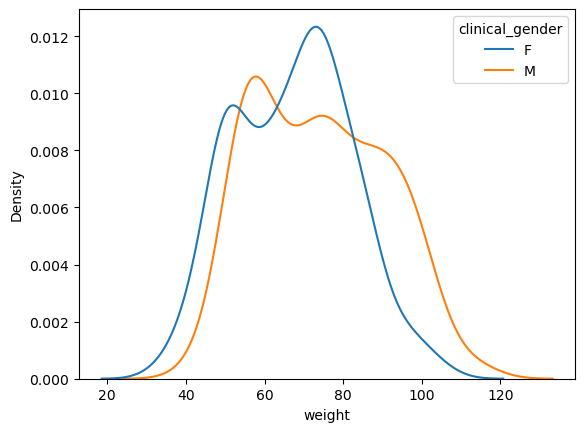

In [598]:
sns.kdeplot(data=df_user_data, x="weight", hue="clinical_gender")

In [ ]:
sns.countplot(data=df_user_join, x="user")

In [942]:
len(df_recipes_filter["title"].unique())

5149

In [599]:
df_user_join

,userId,nutrition_goal,clinical_gender,age_range,life_style,weight,height,projected_daily_calories,cultural_factor,allergy,BMI
0,cynthiaa85a,maintain_fit,F,30-39,Very active,47.88,151,2293.0,vegan_observant,fish,healthy
1,gloria81ec,lose_weight,F,20-29,Lightly active,65.55,153,1452.0,None,None,overweight
2,karena0a0,gain_weight,F,90-100,Moderately active,41.04,151,2025.0,None,None,underweight
3,autumnbd78,maintain_fit,F,20-29,Moderately active,50.45,155,2219.0,vegetarian_observant,None,healthy
4,robert9174,maintain_fit,M,20-29,Sedentary,67.29,179,2049.0,None,None,healthy
...,...,...,...,...,...,...,...,...,...,...,...
495,justina50a,lose_weight,M,70-79,Very active,64.69,152,1892.0,None,None,overweight
496,tyler8373,lose_weight,M,60-69,Moderately active,66.40,154,1826.0,vegan_observant,soy,overweight
497,markb904,maintain_fit,M,80-89,Moderately active,72.65,186,2539.0,vegetarian_observant,shellfish,healthy
498,richard8319,lose_weight,M,50-59,Very active,75.31,164,2487.0,vegan_observant,fish,overweight


In [617]:
bernoulli.rvs(0.6, size=1)[0]

1

In [160]:
class HTML_Table:
    def __init__(self, cols:int = 4, rows: List[str] = None):
        self.cols = cols
        if rows is not None:
            self.rows = rows
        else:
            self.rows = []
    
    def add_rows(self, new_rows=List[str]):
        self.rows.extend(new_rows)
      
    def add_row(self, row:str):
        self.rows.append(row)
    
    def _repr_html_(self):
        return """<table border=\"1\">
        {row}
    </table>""".format(row="\n".join(self.rows))
    
    def render(self):
        return self._repr_html_()

In [161]:
table = HTML_Table()

In [747]:
table.add_row("<tr><th style=\"text-align: left;\"><FONT COLOR=\"#ff0000\"> Tracking simulation: {} days</FONT></th></tr>".format(365))
table.add_row("<tr><th style=\"text-align: left;\">Total users: {}</th></tr>".format(500))
table.add_row("<tr><td colspan=\"2\">Clinical gender male: 50%</td><td colspan=\"2\">Clinical gender female: 50%</td></tr>")
table.add_row("<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>")
table.add_row("<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>")
table.add_row("<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>")
table.add_row("<tr>Nutrition summary</tr>")

In [748]:
print(table.render())

<table border="1">
        <tr><th style="text-align: left;"><FONT COLOR="#ff0000"> Tracking simulation: 365 days</FONT></th></tr>
<tr><th style="text-align: left;">Total users: 500</th></tr>
<tr><td colspan="2">Clinical gender male: 50%</td><td colspan="2">Clinical gender female: 50%</td></tr>
<tr><td>Underweight users: 45 (10.0 %)</td><td>Fit users: 153 (30.0 %)</td><td>Overweight users: 152 (30.0 %)</td><td>Obese users: 153 (30.0 %)</td></tr>
<tr><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th><th>Allergies:</th></tr>
<tr><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th><th>Cultural factors:</th></tr>
<tr>Nutrition summary</tr>
    </table>


In [749]:
table

In [218]:
from IPython import display
from IPython.display import HTML

In [723]:
HTML(table.render())

In [758]:
a = df_user_join["clinical_gender"].value_counts()

In [848]:
for x, val in a.items():
    print(x, val)

M 254
F 246


In [926]:
a = df_user_join.groupby(by=["BMI", "clinical_gender"]).count()

In [928]:
a.xs("healthy", level=0)["userId"]

clinical_gender
F    69
M    84
Name: userId, dtype: int64

In [212]:
def create_a_summary_table(df_total_user, dict_recommendations, simulation_days = 365, max_cols = 4, round_digits = 0):
    meals_dict = {"breakfast":0.3,
                  "morning snacks": 0.05,
                  "afternoon snacks": 0.4,
                  "lunch": 0.05,
                  "dinner": 0.2}
    # Create table 
    table = HTML_Table(cols=max_cols)
    total_users = df_total_user.shape[0]
    # Add rows to the table 
    table.add_row(
        "<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Tracking simulation: {days} days</strong></th></tr>".format(
            span_cols=max_cols,
            days=simulation_days))
    table.add_row("<tr><td style=\"text-align: left;\" colspan=\"{span_cols}\">\
        Total users: {total_users}</td></tr>".format(
        span_cols=max_cols,
        total_users=total_users))
    # Clinical gender 
    clinical_gender_count = df_total_user["clinical_gender"].value_counts()
    # Show clinical gender 
    temp_row = []
    for idx, item in clinical_gender_count.items():
        temp_row.append(f"<td style=\"text-align: left;\" colspan=\"{max_cols/2}\">Clinical gender\
            {'male' if idx == 'M' else 'female'}: {item}\
            users ({np.round((item/total_users)*100, round_digits)} %)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Health condition 
    weight_condition = df_total_user["BMI"].value_counts()
    weight_condition_gender = df_total_user.groupby(by=["BMI", "clinical_gender"]).count()
    temp_row = []
    for idx, item in weight_condition.items():
        weight_gender_count = weight_condition_gender.xs(idx, level=0)["userId"]
        temp_row.append(f"<td style=\"text-align: left;\">Health condition {idx}:\
            {item} users ({np.round((item/total_users)*100, round_digits)} %) \
                <font color=\"lightblue\">(Male: {np.round((weight_gender_count.M/item)*100, round_digits)}%</font>,\
                <font color=\"pink\">Female: {np.round((weight_gender_count.F/item)*100, round_digits)}%</font>)</td>")
    table.add_row("<tr>{row_data}</tr>".format(row_data="".join(temp_row)))
    # Allergies 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Allergies</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "allergy"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Cultural factors
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Cultural factors</strong></th></tr>".format(span_cols=max_cols))
    df_groups = df_total_user.groupby(by=["BMI", "cultural_factor"])
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    allergy_index = list(df_counts.xs("healthy", level=0).index)
    for allergy in allergy_index:
        temp_cols = []
        for hl, per_condition_patient in weight_condition.items():
            users_count = df_counts.loc[(hl, allergy), 'userId']
            temp_cols.append(f"<td style=\"text-align: left;\">{allergy}: {users_count}\
                <font color=\"red\">({np.round((users_count/total_users)*100, 2)} % total)</font> \
                <font color=\"green\">({np.round((users_count/per_condition_patient)*100, 2)} % relative)</font> </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Food summary 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Food Summary</strong></th></tr>".format(span_cols=max_cols))
    temp_dict = {}
    for key, _ in weight_condition.items():
        df_users_list = []
        users = df_total_user[df_total_user["BMI"] == key]["userId"].tolist()
        for u in users:
            df_users_list.append(dict_recommendations[u])
        temp_dict[key] = pd.concat(df_users_list, axis=0)
    # visualize 
    total_recipes = []
    total_recipes_unique = []
    total_recipes_per_meal = {}
    temp_row = []
    temp_cols = []
    df_counts  = df_groups.count()
    meals_index = list(meals_dict.keys())
    for meal in meals_index:
        temp_cols = []
        for hl,_ in weight_condition.items():
            mean = temp_dict[hl][f"{meal}_calories"].mean()
            std = temp_dict[hl][f"{meal}_calories"].std()
            recipes = len(temp_dict[hl][meal])
            unique_recipes = len(temp_dict[hl][meal].unique())
            temp_cols.append(f"<td style=\"text-align: left;\">{meal}: {recipes} recipes ({unique_recipes} unique recipes),\
                calories: {np.round(mean, 1)} Kcals &plusmn; {np.round(std, 1)} Kcals </td>")
        table.add_row("<tr>{cells}</tr>".format(cells="".join(temp_cols))) 
    # Total recipes 
    table.add_row("<tr><th style=\"text-align: center;\" colspan=\"{span_cols}\"><strong>Totals</strong></th></tr>".format(span_cols=max_cols))
    for key, _ in weight_condition.items():
        total_recipes.append(len(temp_dict[key])) 
        list_vals = [len(temp_dict[key][x].unique()) for x in meals_dict.keys()]
        print(list_vals)
        flat_list = []
        total_recipes_unique.append(sum(list_vals))
    table.add_row("<tr>{values}</tr>".format(
            values = "".join([f"<td style=\"text-align: left;\">Total recommend meals: {total_recipes[i]} ({total_recipes_unique[i]} unique)</td>" for i in range(len(total_recipes))])))
    # total recipes per meal 
    total_df_list = [temp_dict[k] for k in temp_dict.keys()]
    total_df = pd.concat(total_df_list, axis=0)
    for meal in meals_dict.keys():
        total_recommendations = len(total_df[meal])
        total_meal = len(total_df[meal].unique())
        table.add_row(f"<tr><td style=\"text-align: left;\", colspan={max_cols}>Total {meal}:\
            {total_recommendations} ({total_meal} uniques)</td></tr>")
    return table

In [213]:
table = create_a_summary_table(df_user_join, simulation_results)

[805, 1282, 991, 1237, 1525]
[873, 1543, 1009, 1532, 1572]
[832, 1322, 1008, 1581, 1567]
[810, 855, 979, 1063, 1483]


In [214]:
table

In [215]:
# create html file for console 
text = f"""
<!DOCTYPE html>
<html>
<head>
<title></title>
</head>
<body>
{table.render()}
</body>
</html>
"""

In [216]:
with open("summary.html", "w") as fp:
    fp.write(text)

In [219]:
HTML(text)